In [1]:
import pandas as pd
import numpy as np

#csv = pd.read_csv("/home/hduser/Dropbox/Analytics/BDA104/titanic2.csv",sep=",")

file_dir = '/home/hduser/Dropbox/Analytics/nfl_draft_2019/data/'
file_name = 'imputed_data.csv'

# read data
csv = pd.read_csv(file_dir + file_name)
# clean raw data
#csv.drop(['Unnamed: 0','num_missing_vals'], axis=1, inplace=True)


In [2]:
csv.columns

Index([u'Unnamed: 0', u'first_round_pick', u'url', u'pick', u'team', u'year',
       u'player', u'pos', u'college', u'weight', u'height_inches', u'forty',
       u'vertical', u'bench', u'broad', u'threecone', u'shuttle',
       u'defense.ast.tackles', u'defense.fum.forced', u'defense.fum.rec',
       u'defense.fum.tds', u'defense.fum.yds', u'defense.games',
       u'defense.int', u'defense.int.td', u'defense.int.yards',
       u'defense.loss.tackles', u'defense.pd', u'defense.sacks',
       u'defense.seasons', u'defense.solo.tackes', u'defense.tackles',
       u'passing.attempts', u'passing.comp.pct', u'passing.completions',
       u'passing.games', u'passing.pass.ints', u'passing.pass.tds',
       u'passing.pass.yards', u'passing.seasons', u'rushing.games',
       u'rushing.rec.td', u'rushing.rec.yards', u'rushing.receptions',
       u'rushing.rush.att', u'rushing.rush.td', u'rushing.rush.yds',
       u'rushing.scrim.plays', u'rushing.scrim.tds', u'rushing.scrim.yds',
       u'rushing

In [9]:
# Data exploration - let's have some fun with charts

csv_1st_xyz = csv.query('first_round_pick==1')[['pick','forty','height_inches','weight','player','defense.sacks','defense.fum.forced']]
csv_rest_xyz = csv.query('first_round_pick==0')[['pick','forty','height_inches','weight','player','defense.sacks','defense.fum.forced']]


In [10]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='onesonesones', api_key='94vQkVs9TQiJcvfmznZj')




In [11]:
trace1 = go.Scatter3d(
    x=csv_1st_xyz['weight'],
    y=csv_1st_xyz['height_inches'],
    z=csv_1st_xyz['forty'],
    text = csv_1st_xyz['player'],
    mode='markers',
    marker=dict(
        size=3,
        symbol='cross',
        line=dict(
            color='rgb(255, 0, 0)',
            width=0.1
        ),
        opacity=1
    )
)


In [12]:
trace2 = go.Scatter3d(
    x=csv_rest_xyz['weight'],
    y=csv_rest_xyz['height_inches'],
    z=csv_rest_xyz['forty'],
    text = csv_rest_xyz['player'],
    mode='markers',
    marker=dict(
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.01
        ),
        opacity=1
    )
)


In [13]:
data = [trace1, trace2]
#layout = go.Layout(
#    margin=dict(
#        l=0,
#        r=0,
#        b=0,
#        t=0
#    )
#)

layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='weight (lbs)'),
                    yaxis = dict(
                        title='height (i)'),
                    zaxis = dict(
                        title='forty (s)'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )


In [14]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='nfl-3d-scatter-hw40')

# interesting graph which shows that faster players (red) are drafted earlier 
# than slower ones

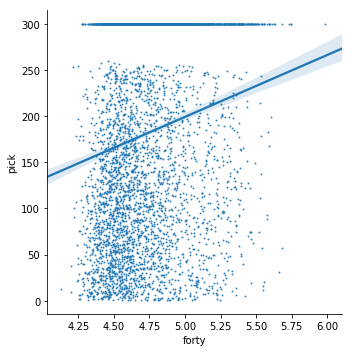

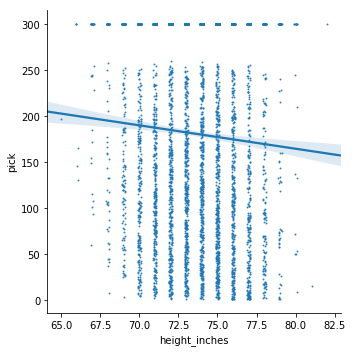

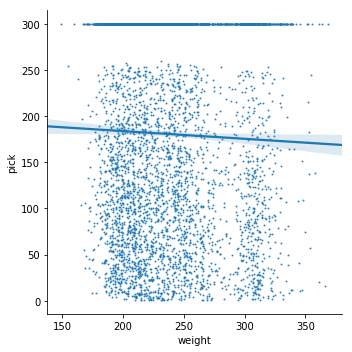

In [16]:
import seaborn as sns
sns.lmplot(x='forty',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})
sns.lmplot(x='height_inches',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})
sns.lmplot(x='weight',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})




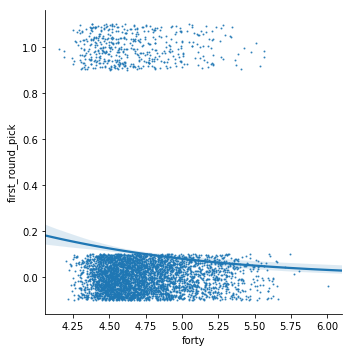

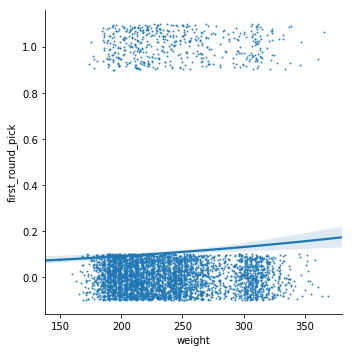

In [21]:
sns.lmplot(x='forty',y='first_round_pick',data=csv,
          logistic=True,x_jitter=.1,y_jitter=.1,scatter_kws={"s": 1})

sns.lmplot(x='weight',y='first_round_pick',data=csv,
          logistic=True,x_jitter=.1,y_jitter=.1,scatter_kws={"s": 1})
